latindex out of bounds: 560
Missing argument


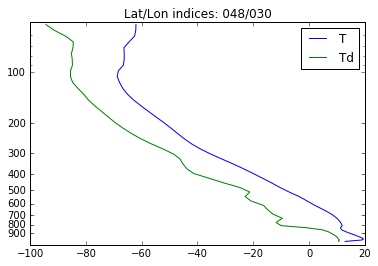

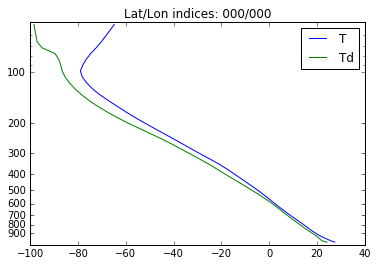

True

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import netCDF4

class WRFPlay(object):

    
    def __init__(self, ncfilepath=None):
        
        try:
            self._dataset = netCDF4.Dataset(ncfilepath)
        except:
            print('Error opening: ' + str(ncfilepath))
            raise Exception
            
    def sounding_plot(self, latindex=None, lonindex=None):
        
        # I know that all arrays use the bottom_top, south_north, and 
        # west_east indices
        if latindex is None or lonindex is None:
            print('Missing argument')
            return None
        
        if latindex and not (0 <= latindex < self._dataset.dimensions['south_north'].size):
            print('latindex out of bounds: ' + str(latindex))
            return None
        
        if lonindex and not (0 <= lonindex < self._dataset.dimensions['west_east'].size):
            print('lonindex out of bounds: ' + str(lonindex))
            return None        
        
        # OK, let's start sucking up and creating the needed variables
        Qv = self._dataset.variables['QVAPOR'][:]
        
        P = self._dataset.variables['P'][:]
        PB = self._dataset.variables['PB'][:]
        P_mb = (P + PB) * 0.01
        
        theta = self._dataset.variables['T'][:] + 300.0
        T_c = theta * (P_mb/1000.0)**(2.0/7.0) - 273.0
        
        A = 2.53E+11   # Pa
        B = 5.42E+03   # K
        e = 0.622      # Unitless

        # Use QVAPOR and P_mb - 1mb = 1hPa = 100Pa

        Td = B / np.log((A*e)/(Qv*P_mb*100)) - 273.0        
        
        
        # So now I have the 3D arrays I need, in the right units
        # Extract the sounding specified by latindex and lonindex
        tc_sounding = T_c[0,:,latindex,lonindex]
        td_sounding = Td[0,:,latindex,lonindex]
        p_sounding = P_mb[0,:,latindex,lonindex]        
        
        plt.semilogy(tc_sounding, p_sounding, label='T')
        plt.semilogy(td_sounding, p_sounding, label='Td')

        plt.ylim(ymin=50.0, ymax=1050.0)

        # Set up ticks and labels on the y-axis
        ylocations = np.arange(100,1000,100)
        plt.yticks(ylocations, ylocations)
        plt.legend()
        plt.gca().invert_yaxis()

        
        title = 'Lat/Lon indices: {:03d}/{:03d}'.format(latindex, lonindex)
        plt.title(title)
        
        plt.show()        

        
        return True
        
        
#---------  Testing the class  ------------------------------------        

WRFOUT_FILE_PATH = '/home/huscicomp/git/hu_cisc601_lu2018/NetCDFPlay/nonversioned_data/'
WRFOUT_FILE_PATH += 'Irmawrfout/wrfout_d01_2017-09-09_12:00:00'
WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'

W = WRFPlay(ncfilepath=WRFOUT_FILE_PATH)

# Test graceful failure
W.sounding_plot(lonindex=8, latindex=560)
W.sounding_plot(lonindex=8)

# Test successful plotting
W.sounding_plot(latindex=48, lonindex=30)
W.sounding_plot(latindex=0, lonindex=0)
            
            
            
            